# Подготовка данных

In [1]:
import pandas as pd

file_path = 'list_tools_listlevel.txt'
data = pd.read_csv(file_path, delimiter='\t')

print("Column names:", data.columns)

secid_listlevel = data[['SECID', 'LISTLEVEL']]

print(secid_listlevel)


Column names: Index(['SECID', 'FIRST_DATE', 'LISTLEVEL', 'SECNAME'], dtype='object')
     SECID  LISTLEVEL
0     EUTR          1
1     GEMC          1
2     PIKK          1
3     PLZL          1
4     POSI          1
..     ...        ...
242  NNSBP          3
243   NSVZ          3
244  IGSTP          3
245  NKNCP          3
246   ZVEZ          3

[247 rows x 2 columns]


In [2]:
import pandas as pd
import os
from datetime import datetime

file_path = 'list_tools_listlevel.txt'
data = pd.read_csv(file_path, delimiter='\t')

data['FIRST_DATE'] = pd.to_datetime(data['FIRST_DATE'])

filtered_data = data[(data['LISTLEVEL'] == 1) & (data['FIRST_DATE'] < datetime(2021, 1, 1))]

directory_path = 'data/'

dataframes = {}

for secid in filtered_data['SECID']:
    filename = f"{secid}-D.txt"
    file_path = os.path.join(directory_path, filename)
    
    if os.path.exists(file_path):
        file_data = pd.read_csv(file_path, delimiter='\t')
        
        
        dataframes[secid] = file_data
        
        
        print(f"Data for {filename}:", file_data.head())  
    else:
        print(f"File not found: {filename}")





Data for PIKK-D.txt:                  begin                  end   open   high    low  close  \
0  2011-12-15 00:00:00  2011-12-15 20:00:16  71.93  73.47  71.30  73.00   
1  2011-12-16 00:00:00  2011-12-16 23:59:59  73.11  76.91  72.60  76.91   
2  2011-12-19 00:00:00  2011-12-19 23:59:59  75.66  75.90  73.83  74.00   
3  2011-12-20 00:00:00  2011-12-20 23:59:59  73.60  74.23  72.04  73.99   
4  2011-12-21 00:00:00  2011-12-21 23:59:59  75.79  75.88  74.69  74.85   

        value    volume  
0  23378181.2  322230.0  
1  30770036.5  412280.0  
2  14643983.3  195470.0  
3  33753719.9  459650.0  
4  20013477.8  266440.0  
Data for PLZL-D.txt:                  begin                  end   open   high    low  close  \
0  2014-06-09 00:00:00  2014-06-09 23:59:59  514.7  514.9  510.1  511.6   
1  2014-06-10 00:00:00  2014-06-10 23:59:59  513.3  513.9  504.0  507.0   
2  2014-06-11 00:00:00  2014-06-11 23:59:59  508.0  525.0  507.0  512.8   
3  2014-06-16 00:00:00  2014-06-16 23:59:59  477.6 

In [3]:
import pandas as pd
import os
from datetime import datetime


filtered_dataframes = {}

for secid, df in dataframes.items():
    if not pd.api.types.is_datetime64_any_dtype(df['begin']):
        df['begin'] = pd.to_datetime(df['begin'])
    
    filtered_df = df[df['begin'] > datetime(2021, 1, 1)]
    
    filtered_dataframes[secid] = filtered_df

all_start_dates = [(secid, df['begin'].iloc[0]) for secid, df in filtered_dataframes.items() if not df.empty]

most_common_date = pd.Series([date for _, date in all_start_dates]).mode()[0]

different_start_dates_secids = [secid for secid, date in all_start_dates if date != most_common_date]

if different_start_dates_secids:
    print("Files with different start dates:", different_start_dates_secids)
else:
    print("All files start on the same date:", most_common_date)

print("Unique start dates found:", set(date for _, date in all_start_dates))

row_counts = {secid: df.shape[0] for secid, df in filtered_dataframes.items()}
common_row_count = pd.Series(list(row_counts.values())).mode()[0]

different_row_counts = {secid: count for secid, count in row_counts.items() if count != common_row_count}

if different_row_counts:
    print("DataFrames with different row counts:")
    for secid, count in different_row_counts.items():
        print(f"SECID: {secid}, Row Count: {count}")
else:
    print("All DataFrames have the same number of rows.")


All files start on the same date: 2021-01-04 00:00:00
Unique start dates found: {Timestamp('2021-01-04 00:00:00')}
DataFrames with different row counts:
SECID: RNFT, Row Count: 818
SECID: FLOT, Row Count: 818
SECID: FIVE, Row Count: 804
SECID: FEES, Row Count: 806
SECID: ETLN, Row Count: 816
SECID: GLTR, Row Count: 817
SECID: GMKN, Row Count: 816
SECID: HHRU, Row Count: 817
SECID: LSRG, Row Count: 818
SECID: MDMG, Row Count: 816
SECID: MSNG, Row Count: 818
SECID: MTLR, Row Count: 818
SECID: MTLRP, Row Count: 818
SECID: MVID, Row Count: 818
SECID: OKEY, Row Count: 816
SECID: OZON, Row Count: 817
SECID: AQUA, Row Count: 818
SECID: UPRO, Row Count: 818
SECID: TRNFP, Row Count: 816
SECID: RTKMP, Row Count: 818
SECID: TGKA, Row Count: 818
SECID: BELU, Row Count: 818
SECID: TCSG, Row Count: 798
SECID: AGRO, Row Count: 816
SECID: BSPB, Row Count: 818
SECID: SELG, Row Count: 818
SECID: SFIN, Row Count: 818
SECID: YNDX, Row Count: 817
SECID: SMLT, Row Count: 818


In [4]:
date_sets = {secid: set(df['begin']) for secid, df in filtered_dataframes.items()}


common_dates = set.intersection(*date_sets.values())


aligned_dataframes = {}
for secid, df in filtered_dataframes.items():

    aligned_df = df[df['begin'].isin(common_dates)]
    aligned_dataframes[secid] = aligned_df

aligned_row_counts = {secid: df.shape[0] for secid, df in aligned_dataframes.items()}
print("Row counts after alignment:")
for secid, count in aligned_row_counts.items():
    print(f"SECID: {secid}, Row Count: {count}")

if len(set(aligned_row_counts.values())) == 1:
    print("Success: All DataFrames now have the same number of rows and aligned dates.")
else:
    print("Error: There's still inconsistency in row counts or dates.")


Row counts after alignment:
SECID: PIKK, Row Count: 767
SECID: PLZL, Row Count: 767
SECID: GAZP, Row Count: 767
SECID: RNFT, Row Count: 767
SECID: FLOT, Row Count: 767
SECID: FIVE, Row Count: 767
SECID: ROSN, Row Count: 767
SECID: FEES, Row Count: 767
SECID: ETLN, Row Count: 767
SECID: ENPG, Row Count: 767
SECID: GLTR, Row Count: 767
SECID: GMKN, Row Count: 767
SECID: PHOR, Row Count: 767
SECID: HHRU, Row Count: 767
SECID: LKOH, Row Count: 767
SECID: LSRG, Row Count: 767
SECID: MAGN, Row Count: 767
SECID: MDMG, Row Count: 767
SECID: MOEX, Row Count: 767
SECID: MSNG, Row Count: 767
SECID: MTLR, Row Count: 767
SECID: MTLRP, Row Count: 767
SECID: MVID, Row Count: 767
SECID: IRAO, Row Count: 767
SECID: NLMK, Row Count: 767
SECID: NVTK, Row Count: 767
SECID: HYDR, Row Count: 767
SECID: OKEY, Row Count: 767
SECID: OZON, Row Count: 767
SECID: MTSS, Row Count: 767
SECID: RTKM, Row Count: 767
SECID: RUAL, Row Count: 767
SECID: ALRS, Row Count: 767
SECID: AQUA, Row Count: 767
SECID: UPRO, Row Co

# Предсказания

In [5]:
import pandas as pd

file_path = 'security.csv'
data = pd.read_csv(file_path, encoding='windows-1251', delimiter=';', decimal=',')

data.head()

BOARDID  SECID   TRADEDATE        SHORTNAME             NAME    CLOSE  \
0    SNDX  IMOEX  04.01.2021  Индекс МосБиржи  Индекс МосБиржи  3350.51   
1    SNDX  IMOEX  05.01.2021  Индекс МосБиржи  Индекс МосБиржи  3359.15   
2    SNDX  IMOEX  06.01.2021  Индекс МосБиржи  Индекс МосБиржи  3371.03   
3    SNDX  IMOEX  08.01.2021  Индекс МосБиржи  Индекс МосБиржи  3454.82   
4    SNDX  IMOEX  11.01.2021  Индекс МосБиржи  Индекс МосБиржи  3482.48   

      OPEN     HIGH      LOW         VALUE  DURATION  YIELD  DECIMALS  \
0  3306.12  3350.81  3304.17  6.687503e+10         0      0         2   
1  3327.94  3365.32  3301.88  7.166972e+10         0      0         2   
2  3373.37  3380.63  3344.43  7.145809e+10         0      0         2   
3  3390.23  3474.66  3390.23  1.321056e+11         0      0         2   
4  3455.67  3516.90  3436.66  1.432925e+11         0      0         2   

   CAPITALIZATION CURRENCYID       DIVISOR  TRADINGSESSION  VOLUME  
0    1.701802e+13        RUB  5.079231e+09               3     NaN  
1    1.706189e+13        RUB  5.079231e+09               3     NaN  
2    1.712225e+13        RUB  5.079231e+09               3     NaN  
3    1.754780e+13        RUB  5.079231e+09               3     NaN  
4    1.768832e+13        RUB  5.079231e+09               3     NaN

In [6]:
df_copy = aligned_dataframes.copy()


In [7]:
print(df_copy['PIKK'][['begin', 'end', 'open']])

          begin                  end   open
2277 2021-01-04  2021-01-04 23:59:59  598.0
2278 2021-01-05  2021-01-05 23:59:59  595.5
2279 2021-01-06  2021-01-06 23:59:59  600.0
2280 2021-01-08  2021-01-08 23:59:59  595.0
2281 2021-01-11  2021-01-11 23:59:59  593.4
...         ...                  ...    ...
3077 2024-03-26  2024-03-26 23:59:59  865.0
3078 2024-03-27  2024-03-27 23:59:59  880.4
3079 2024-03-28  2024-03-28 23:59:59  906.5
3080 2024-03-29  2024-03-29 23:59:59  899.4
3081 2024-04-01  2024-04-01 23:59:59  888.8

[767 rows x 3 columns]


In [8]:

import vectorbt as vbt
import pandas as pd
from arch import arch_model
import numpy as np

def dynamic_scale(data):
    max_val = data['close'].max()
    if max_val > 1000:
        return 0.1 * (1000 / max_val)
    elif max_val < 1:
        return 1 / max_val
    else:
        return 0.1
def calculate_mu_utility(E_garch, sigma_garch, riskfree_rate, alpha):
    """
    Рассчитывает оптимальную долю капитала (μ) для одной акции.
    
    :param E_garch: Ожидаемая доходность актива (E(GARCH))
    :param sigma_garch: Волатильность актива (σ(GARCH))
    :param riskfree_rate: Безрисковая ставка (r_riskfree)
    :param alpha: Коэффициент штрафа за риск
    :return: Оптимальная доля капитала (μ)
    """
    # Если ожидаемая доходность ниже безрисковой ставки, μ = 0
    if E_garch <= riskfree_rate:
        return 0

    # Коэффициент перед μ в функции полезности
    
    coeff = E_garch - riskfree_rate - alpha * sigma_garch
    


    
    if coeff >= 0:
        return 1

    # Максимальное μ, где функция полезности >= 0
    mu = -riskfree_rate / coeff

    print(f"E(GARCH): {E_garch:.3f}, σ(GARCH): {sigma_garch:.3f}, Coefficient: {coeff:.5f}, mu: {mu:.5f}")

    # Устанавливаем границы на μ
    if mu > 1:
        mu = 1

    return mu


In [9]:
riskfree_rate_year = 0.18  # Безрисковая ставка годовая
riskfree_rate = (1 + riskfree_rate_year) ** (1 / 365) - 1
alpha_year = 0.5  # Коэффициент склонности к риску
alpha = alpha_year / ((365)**(1/2))
print(f"riskfree rate: {riskfree_rate}")

riskfree rate: 0.00045356704544685655


In [10]:
# Функция для прогноза GARCH с использованием заданного окна
def garch_predict(data, prediction_start, prediction_end, window_size):
    predictions = []
    mus = []

    data = data.copy()
    scale_factor = dynamic_scale(data)
    data.loc[:, 'close_scaled'] = data['close'] * scale_factor

    for i in range(max(prediction_start, window_size), prediction_end):
        # Берем данные для окна обучения, ограничиваем так, чтобы не выйти за начало массива
        train_data = data.iloc[i - window_size:i]

        # Строим и обучаем модель на train_data
        model = arch_model(train_data['close_scaled'], vol='Garch', p=1, q=1, rescale=False)
        model_fitted = model.fit(disp='off')
        last_conditional_volatility = model_fitted.conditional_volatility.iloc[-1]
        forecast = model_fitted.forecast(horizon=1)
        
        # Преобразуем предсказанное значение обратно
        predicted_close_scaled = forecast.mean.iloc[-1, 0]
        predicted_close = predicted_close_scaled / scale_factor
        
        predictions.append(predicted_close)

        # Рассчитываем ожидаемую доходность и волатильность
        expected_return = (predicted_close - data['open'].iloc[i]) / data['open'].iloc[i]
        #forecast_variance = forecast.variance.iloc[-1, 0] 
        #volatility = np.sqrt(forecast_variance) / scale_factor / data['open'].iloc[i]
        volatility = last_conditional_volatility / scale_factor / data['open'].iloc[i]
        #print(volatility)

        mu = calculate_mu_utility(expected_return, volatility, riskfree_rate, alpha)
        mus.append(mu)
        
    if prediction_start < window_size :
        nan_padding = [np.nan] * window_size
        predictions = nan_padding + predictions
        mus = nan_padding + mus
        
    return np.array(predictions), np.array(mus)




In [11]:
# Функция для выбора оптимального окна на основании наилучшего Sharpe Ratio
def find_optimal_window(data, possible_windows, training_start, training_end):
    best_window = None
    best_sharpe = -np.inf
    for window_size in possible_windows:
        # Прогнозируем с данным размером окна на тренировочных данных
        predictions, mus = garch_predict(data.iloc[:training_end], training_start, training_end, window_size)
        # Генерируем сигналы для проверки на тренировочных данных
        temp_data = data.iloc[training_start:training_end].copy()
        temp_data['Predicted_Close'] = predictions
        temp_data.loc[:, 'Signal'] = np.where(temp_data['Predicted_Close'] > temp_data['open'], 1, 0)
        temp_data.loc[:, 'Exit_Signal'] = temp_data['Signal'].shift(1)
        #51
        temp_data.loc[temp_data.index[0], 'Exit_Signal'] = 0


        entries = temp_data['Signal'] == 1
        exits = temp_data['Exit_Signal'] == 1
        price = temp_data['close']

        # Создаем временный портфель для оценки эффективности
        pf = vbt.Portfolio.from_signals(
            close=price,
            entries=entries,
            exits=exits,
            init_cash=10000,
            freq='1D'
        )
        stats = pf.stats()
        sharpe_ratio = stats['Sharpe Ratio']

        # Сохраняем лучший размер окна
        if sharpe_ratio > best_sharpe:
            best_sharpe = sharpe_ratio
            best_window = window_size

    return best_window


In [12]:
possible_windows = [30, 40, 50, 60, 70]
training_period = 80  # Количество дней для оптимизации

init_cash = 100000

def compute_asset(df_copy, asset):
    data = df_copy[asset][['begin', 'open', 'close']]
    data = data.dropna(subset=['close', 'open'])
    
    # Волк-форвард оптимизация
    total_days = len(data)
    optimal_windows = []
    mus = []
    mus[:training_period] = [0] * training_period

    # Применение волк-форвард стратегии
    for start in range(0, total_days - training_period, training_period):
        training_start = start
        training_end = start + training_period
        optimal_window = find_optimal_window(data, possible_windows, training_start, training_end)
        optimal_windows.append(optimal_window)
        print(f"Optimized window for period starting {training_start}: {optimal_window}")

        # Использование найденного оптимального окна на следующих 100 днях
        prediction_start = training_end
        prediction_end = min(prediction_start + training_period, total_days)
        predictions, mus_partial = garch_predict(data.iloc[:prediction_end], prediction_start, prediction_end, optimal_window)

        print(f"Prediction range length: {len(data.index[prediction_start:prediction_end])}, Predictions length: {len(predictions)}")
        print(mus_partial)

    #     if len(predictions) > len(data.index[prediction_start:prediction_end]):
    #         predictions = predictions[:len(data.index[prediction_start:prediction_end])]
        # Применяем прогнозы
        data.loc[data.index[prediction_start:prediction_end], 'Predicted_Close'] = predictions
        # Добавляем рассчитанные значения \(\mu\) к общему списку
        mus.extend(mus_partial)

    # Генерация торговых сигналов для финальных предсказаний
    data.loc[:, 'Signal'] = np.where(data['Predicted_Close'] > data['open'], 1, 0)
    data.loc[:, 'Exit_Signal'] = data['Signal'].shift(1)
    data.loc[data.index[0], 'Exit_Signal'] = 0

    entries = data['Signal'] == 1
    exits = data['Exit_Signal'] == 1
    price = data['close']

    entries.iloc[-1] = False
    exits.iloc[-1] = True
    # Преобразуем mus в Series, чтобы сохранить индексацию
    mu_series = pd.Series(mus, index=data.index[-len(mus):])  # Индексация для дней с \(\mu\)
    #sizes = np.array(mu_series) * init_cash / price.values  # Рассчитываем количество акций

    print(mu_series[(mu_series != 1) & (mu_series != 0)])

    def make_vbt_columns(data, entries, sizes):
        # Combine open and close prices
        price = np.ravel(np.column_stack((data['open'], data['close'])))
        
        # entries_vbt = [entries[0], entries[1]&entries[0]]
        # exits_vbt   = [False, exits[0]]
        
    
        entries_fake = [False] * len(data)
        entries_vbt = np.ravel(np.column_stack((entries, entries_fake)))
        
        
        exits_vbt = [False] + list(entries_vbt[:-1])
        exits_vbt[-1] = True

        sizes_vbt = np.ravel(np.column_stack((sizes, sizes)))
        
        return entries_vbt, exits_vbt, price, sizes_vbt
    entries_vbt, exits_vbt, price, sizes_vbt = make_vbt_columns(data, entries, mu_series)
    return entries_vbt, exits_vbt, price, sizes_vbt

In [13]:

entries, exits, price, sizes = compute_asset(df_copy, 'PIKK')

mu_test = [1] * 767  

#sizes = np.array(mu_series) * init_cash / price.values  # Рассчитываем количество акций

pft = vbt.Portfolio.from_signals(
    close=price,
    entries=entries,
    exits=exits,
    size=sizes,  # Масштабированные размеры сделок
    size_type='Percent',  # Интерпретируем процент открытой позиции
    init_cash=init_cash,
    freq='1D',
    sl_stop=0.10  # Стоп-лосс на уровне 10%
)

stats = pft.stats()
print(stats)

pft.plot().show()

#alpha уменьшить на sqrt(365)

Optimized window for period starting 0: 60
Prediction range length: 80, Predictions length: 80
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Optimized window for period starting 80: 40
Prediction range length: 80, Predictions length: 80
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0]
E(GARCH): 0.001, σ(GARCH): 0.016, Coefficient: -0.00030, mu: 1.51225
Optimized window for period starting 160: 50
Prediction range length: 80, Predictions length: 80
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1]
E(GARCH): 0.001, σ(GARCH): 0.024, Coefficient: -0.00017, mu: 2.67527
Optimized window for period starting 240: 40
E(GARCH): 0.001, σ(GARCH): 0.044, Coe

In [14]:
print(df_copy['PIKK']['open'][90:100])
print(df_copy['PIKK']['close'][90:100])

2367    1014.0
2368     991.5
2369     979.3
2370     959.3
2371     956.5
2372     945.0
2373     972.2
2374     989.0
2375     991.2
2376     970.1
Name: open, dtype: float64
2367    1028.9
2368     979.3
2369     959.3
2370     958.6
2371     945.9
2372     979.7
2373     992.6
2374     990.7
2375     977.1
2376     996.0
Name: close, dtype: float64


In [15]:
from joblib import Parallel, delayed

prices = pd.DataFrame()
entries = pd.DataFrame()
exits = pd.DataFrame()
sizes = pd.DataFrame()


selected_assets = list(df_copy.keys())


# Функция для обработки одного актива
def process_asset(df_copy, asset):
    print(f"Processing asset: {asset}")
    entries_one, exits_one, prices_one, sizes_one = compute_asset(df_copy, asset)
    return asset, prices_one, entries_one, exits_one, sizes_one

# Параллельная обработка всех активов
results = Parallel(n_jobs=4)(delayed(process_asset)(df_copy, asset) for asset in selected_assets)




In [16]:
# Сохранение результатов
for asset, prices_one, entries_one, exits_one, sizes_one in results:
    #print(prices_one)
    prices[asset] = prices_one
    entries[asset] = entries_one
    exits[asset] = exits_one
    sizes[asset] = sizes_one

  

# Создаем финальный портфель с оптимальными окнами для каждого актива
pf = vbt.Portfolio.from_signals(
    close=prices,
    entries=entries,
    exits=exits,
    size=sizes,
    size_type='Percent',
    init_cash=init_cash,
    freq='1D',
    sl_stop=0.10  # Трейлинг-стоп 10%
)

# Выводим статистику финального портфеля
stats = pf.stats()
print(stats)

Start                                                    0
End                                                   1533
Period                                  1534 days 00:00:00
Start Value                                       100000.0
End Value                                     53427.759302
Total Return [%]                                -46.572241
Benchmark Return [%]                             50.447138
Max Gross Exposure [%]                               100.0
Total Fees Paid                                        0.0
Max Drawdown [%]                                 60.382373
Max Drawdown Duration         1138 days 15:42:32.727272720
Total Trades                                    316.072727
Total Closed Trades                             316.072727
Total Open Trades                                      0.0
Open Trade PnL                                         0.0
Win Rate [%]                                     44.327518
Best Trade [%]                                   15.7709

C:\Users\rasst\AppData\Local\Temp\ipykernel_8252\2506927422.py:24: UserWarning:

Object has multiple columns. Aggregating using <function mean at 0x0000027FE4DE94E0>. Pass column to select a single column/group.



In [17]:
daily_trades = entries.sum(axis=1)
daily_positions_size = sizes.sum(axis=1)  

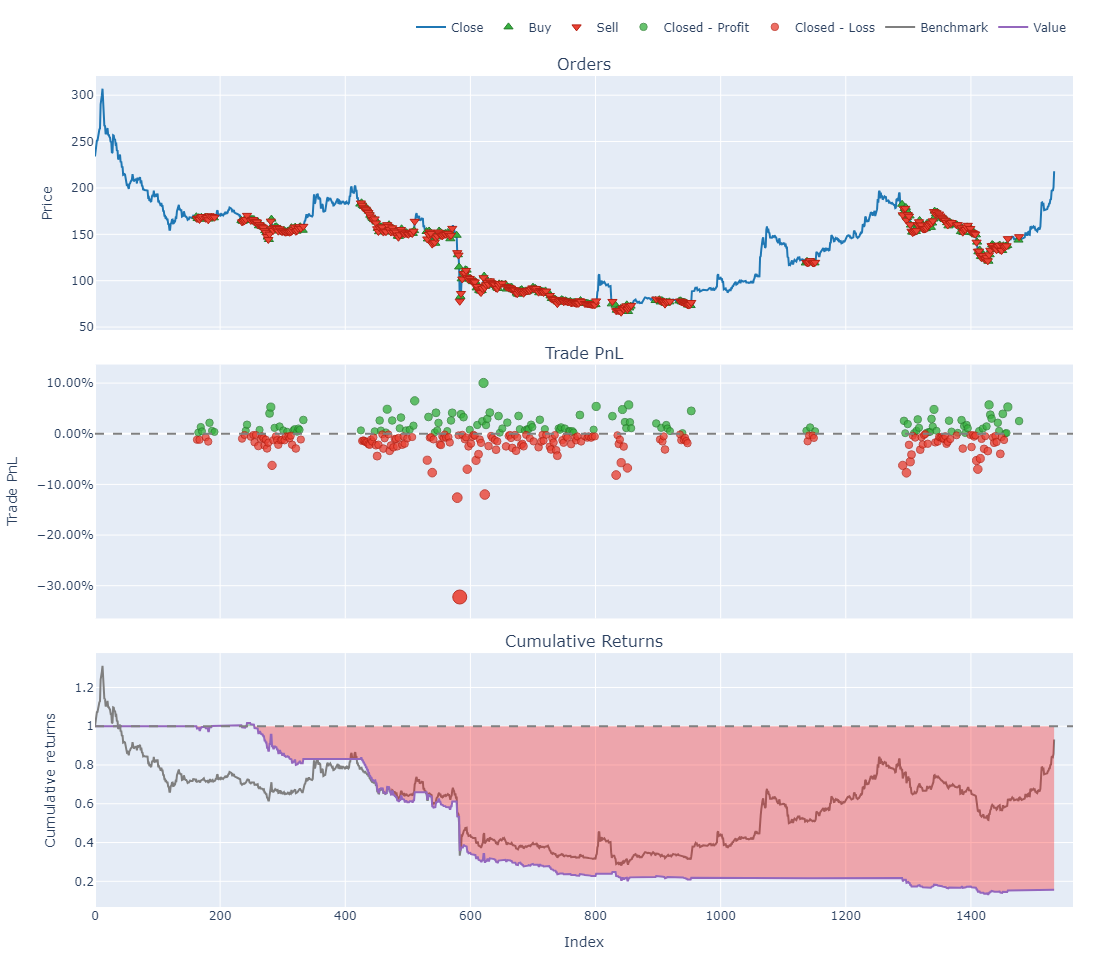

In [23]:
pf.plot(column='RNFT').show()  # Строим график только для одного актива

In [24]:
pf.stats(column='RNFT')

Start                                          0
End                                         1533
Period                        1534 days 00:00:00
Start Value                             100000.0
End Value                           15596.279701
Total Return [%]                       -84.40372
Benchmark Return [%]                   -6.837607
Max Gross Exposure [%]                     100.0
Total Fees Paid                              0.0
Max Drawdown [%]                       86.922003
Max Drawdown Duration         1285 days 00:00:00
Total Trades                                 347
Total Closed Trades                          347
Total Open Trades                              0
Open Trade PnL                               0.0
Win Rate [%]                           36.599424
Best Trade [%]                         10.021322
Worst Trade [%]                       -32.229965
Avg Winning Trade [%]                   1.838225
Avg Losing Trade [%]                   -1.958595
Avg Winning Trade Du

In [20]:
# Выводим Win Rate для каждого актива
for asset in selected_assets:
    stats = pf.stats(column=asset)  # Получаем статистику для одного актива
    win_rate = stats.loc['Win Rate [%]']  # Извлекаем Win Rate [%]
    print(f"Актив: {asset}, Win Rate [%]: {win_rate:.2f}")


Актив: PIKK, Win Rate [%]: 47.59
Актив: PLZL, Win Rate [%]: 44.78
Актив: GAZP, Win Rate [%]: 40.41
Актив: RNFT, Win Rate [%]: 36.60
Актив: FLOT, Win Rate [%]: 38.46
Актив: FIVE, Win Rate [%]: 43.54
Актив: ROSN, Win Rate [%]: 49.34
Актив: FEES, Win Rate [%]: 42.11
Актив: ETLN, Win Rate [%]: 41.93
Актив: ENPG, Win Rate [%]: 36.61
Актив: GLTR, Win Rate [%]: 38.72
Актив: GMKN, Win Rate [%]: 44.50
Актив: PHOR, Win Rate [%]: 46.83
Актив: HHRU, Win Rate [%]: 47.67
Актив: LKOH, Win Rate [%]: 42.23
Актив: LSRG, Win Rate [%]: 41.76
Актив: MAGN, Win Rate [%]: 48.62
Актив: MDMG, Win Rate [%]: 37.45
Актив: MOEX, Win Rate [%]: 41.24
Актив: MSNG, Win Rate [%]: 42.76
Актив: MTLR, Win Rate [%]: 44.17
Актив: MTLRP, Win Rate [%]: 50.22
Актив: MVID, Win Rate [%]: 40.65
Актив: IRAO, Win Rate [%]: 45.76
Актив: NLMK, Win Rate [%]: 48.82
Актив: NVTK, Win Rate [%]: 44.31
Актив: HYDR, Win Rate [%]: 46.89
Актив: OKEY, Win Rate [%]: 39.33
Актив: OZON, Win Rate [%]: 42.33
Актив: MTSS, Win Rate [%]: 43.09
Актив: RT

       PIKK   PLZL   GAZP   RNFT   FLOT   FIVE   ROSN   FEES   ETLN   ENPG  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1529  False  False   True  False   True  False   True  False  False   True   
1530  False  False  False  False  False  False  False  False  False  False   
1531  False  False   True  False   True  False   True   True  False   True   
1532  False  False  False  False  False  False  False  False  False  False   
1533   True   True   True   True   True   True   True   True   True   True   

      ...   SBER  SBERP   SELG   SFIN   CBOM   VTBR   YNDX   CH

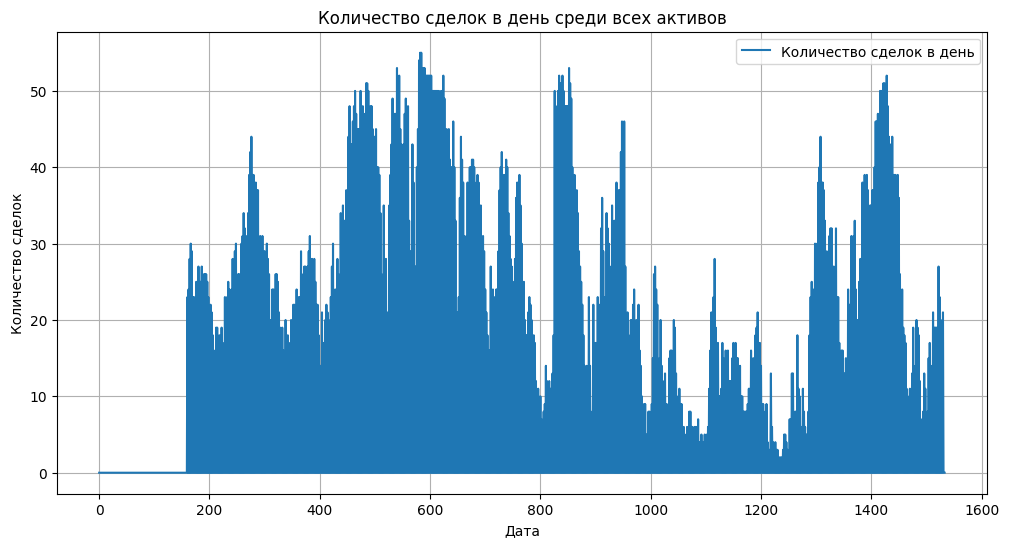

In [21]:
#график сколько сделок в день
import matplotlib.pyplot as plt

print(exits)
print(entries)
print(sizes['RNFT'][-300:-210])
print(entries['RNFT'][-300:-210])
print(exits['RNFT'][-300:-210])

plt.figure(figsize=(12, 6))
plt.plot(daily_trades, label='Количество сделок в день')
plt.title('Количество сделок в день среди всех активов')
plt.xlabel('Дата')
plt.ylabel('Количество сделок')
plt.legend()
plt.grid()
plt.show()

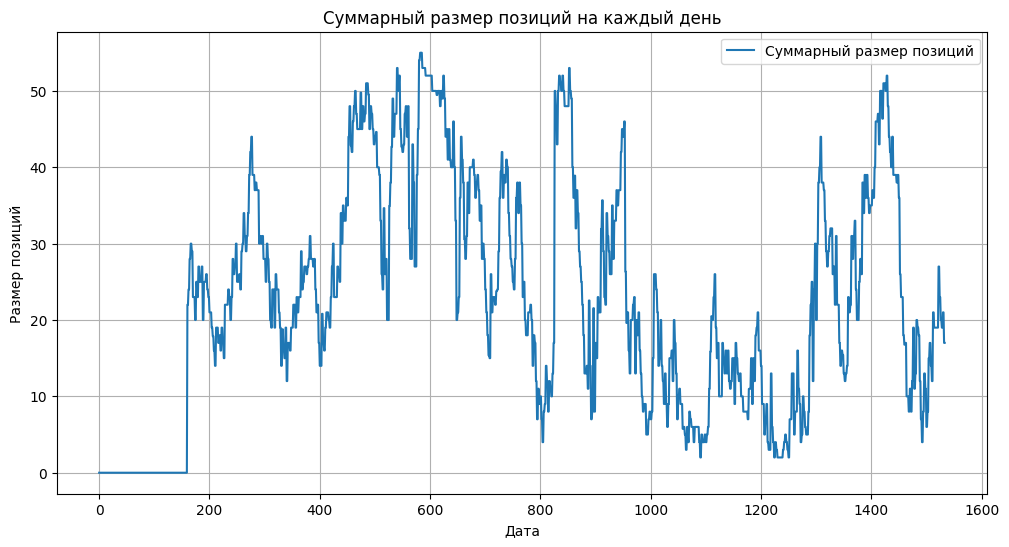

In [22]:
#график суммарные mu
#это суммарные sizes, mu не вытаскиваю
plt.figure(figsize=(12, 6))
plt.plot(daily_positions_size, label='Суммарный размер позиций')
plt.title('Суммарный размер позиций на каждый день')
plt.xlabel('Дата')
plt.ylabel('Размер позиций')
plt.legend()
plt.grid()
plt.show()